## What does this notebook do?
This notebook accesses data from the [UCS Satellite Database](https://www.ucsusa.org/resources/satellite-database) to plot the purpose of payloads launched in orbit. The database includes in-depth details on the 7,560 satellites currently orbiting Earth, including their country of origin, purpose, and other operational information. For extra information, please refer to the [user's manual](https://s3.amazonaws.com/ucs-documents/nuclear-weapons/sat-database/4-11-17-update/User+Guide+1-1-17+wAppendix.pdf).

## Requirements:
To use this notebook uncomment and run the required line below to ensure necessary packages are present locally/ in the cloud.

In [1]:
# %pip install matplotlib pandas seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

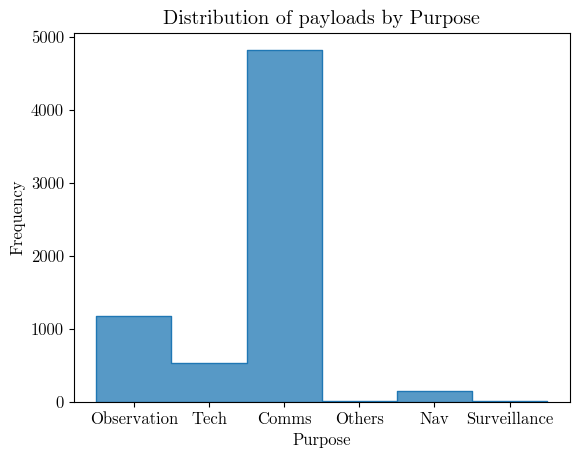

In [3]:
"""
UCS Satellite Database
In-depth details on the 7,560 satellites
currently orbiting Earth, including their 
country of origin, purpose, and other 
operational details.
"""
FILE_PATH1 = "../sources/UCS-Satellite-Database-1-1-2023.xlsx"

dataFrame1 = pd.read_excel(FILE_PATH1)

# Drops columns with NaN values
dataFrame1.dropna(axis = 1, inplace = True)

"""
Using any available fonts is permissible for the plots, 
but I chose CMU Serif for aesthetic reasons.
For Ubuntu you can install the font package fonts-cmu 
(using sudo apt install fonts-cmu) which contains the fonts.
"""
# plt.rcParams['font.family'] = "CMU Serif"
# plt.rcParams['font.size'] = 12

dataFrame1["Inclination (degrees)"] = pd.to_numeric(dataFrame1["Inclination (degrees)"], 
                                                    errors = 'coerce')
dataFrame1 = dataFrame1[(dataFrame1["Inclination (degrees)"] >= 0) & 
                        (dataFrame1["Inclination (degrees)"] <= 180)]

dataFrame1['Purpose'] = dataFrame1['Purpose'].str.rstrip()
dataFrame1['Purpose'] = dataFrame1['Purpose'].str.replace(r'\s+', ' ', regex = True)
dataFrame1['Purpose'] = dataFrame1['Purpose'].str.split('/').str[0]

replacementDict = {
    'Communications': 'Comms',
    "Earth Observation": 'Observation',
    "Technology Development": 'Tech',
    'Navigation': 'Nav',
    "Space Science": 'Tech',
    "Technology Demonstration": 'Tech',
    "Earth Science": 'Tech',
    'Unknown': 'Others',
    "Space Observation": 'Observation',
    'Earth': 'Observation',
    "Mission Extension Technology": 'Tech',
    'Educational': 'Others',
    'Platform': 'Others',
    "Satellite Positioning": 'Nav'
}

dataFrame1['Purpose'] = dataFrame1['Purpose'].replace(replacementDict)

# Plots the distribution of payloads by purpose
sns.histplot(x = 'Purpose', data = dataFrame1, element = 'step')

plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title("Distribution of payloads by Purpose")

plt.show()